<a href="https://colab.research.google.com/github/hatoonGH/GH-/blob/main/AI342Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [1]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt

## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [2]:
# Task: Create an 8x8 black image (matrix of zeros)
image = np.zeros((8, 8))
print(image)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


# --- Discussion Questions ---
# 1. What is the spatial resolution of this image?
 8*8 pixels.
# 2. What does each value represent?
intensity of each pixal

##**Exercise 2.2: Visualise the image**

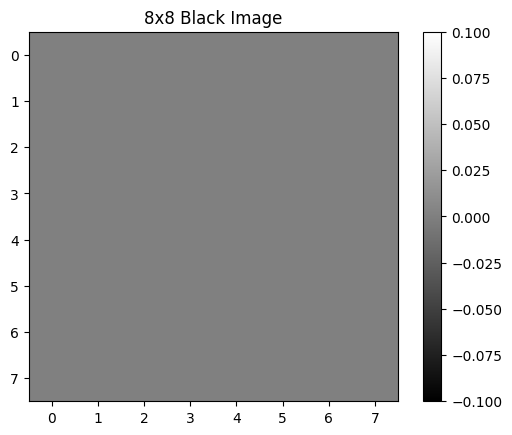

In [3]:
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()


# Task: Change some pixels to 255 (White) and re-visualize
image[2, 2] = 255
image[5, 6] = 255

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


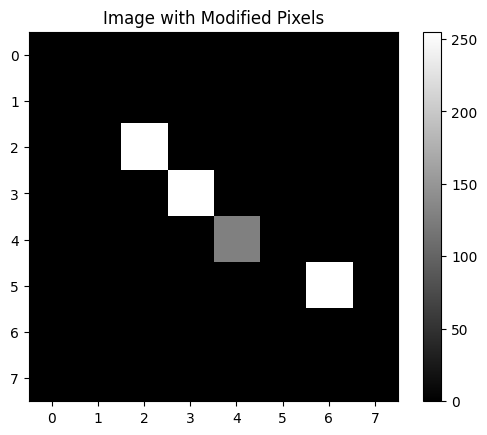

In [4]:
image[3, 3] = 255
image[4, 4] = 128

plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

#Questions
#1.	Which pixel is brighter and why?
The pixel with value 255 is brighter because higher pixel values mean higher brightness in grayscale images.
#2.	How does quantisation affect visual appearance?
Quantisation limits the number of intensity levels, so some smooth changes in brightness may not appear clearly and some details can be lost.

## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


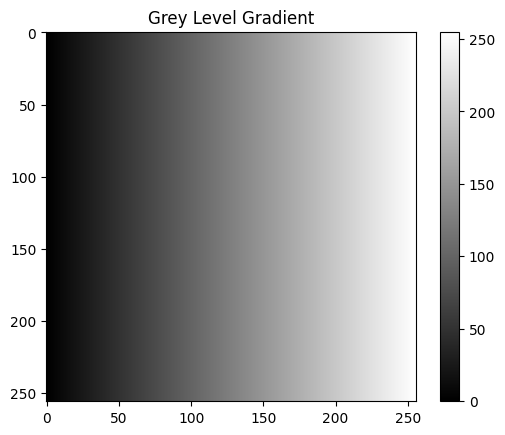

In [5]:
gradient = np.tile(np.linspace(0, 255, 256), (256, 1))

plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()

In [6]:
gradient.dtype

dtype('float64')

#Questions
#1.	How many grey levels are visible?
There are 256 grey levels visible.
#2.	What data type is used to store the pixel values?
The pixel values are stored using the float64 data type.


## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(512, 512, 3)
float32


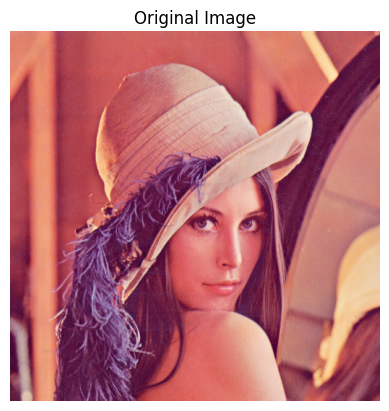

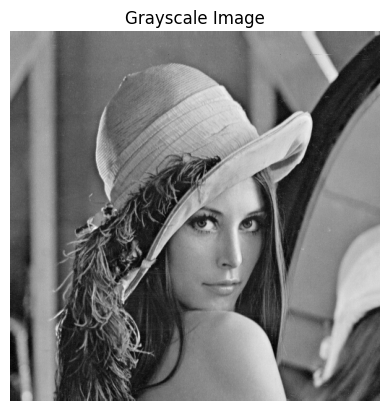

In [10]:
from matplotlib.image import imread

image = imread('Lenna_(test_image).png')

print(image.shape)
print(image.dtype)

plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

gray = image.mean(axis=2)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

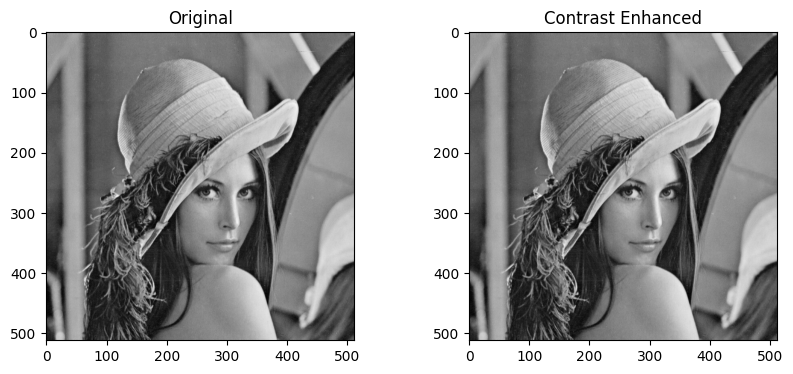

In [11]:
min_val = gray.min()
max_val = gray.max()

enhanced = (gray - min_val) / (max_val - min_val) * 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')
plt.title("Contrast Enhanced")

plt.show()

#Questions
#1.	Which image has better visibility of details?
The contrast enhanced image has better visibility because the differences between dark and bright areas are clearer.
#2.	Is this enhancement subjective or objective?
This enhancement is objective because it is done using a mathematical method and not based on personal opinion.

## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

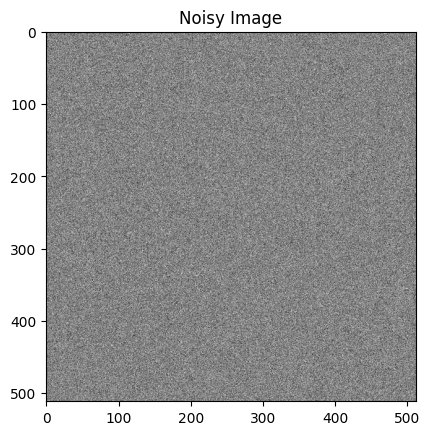

In [12]:
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise

plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()

## **Exercise 7.2: Simple smoothing filter**

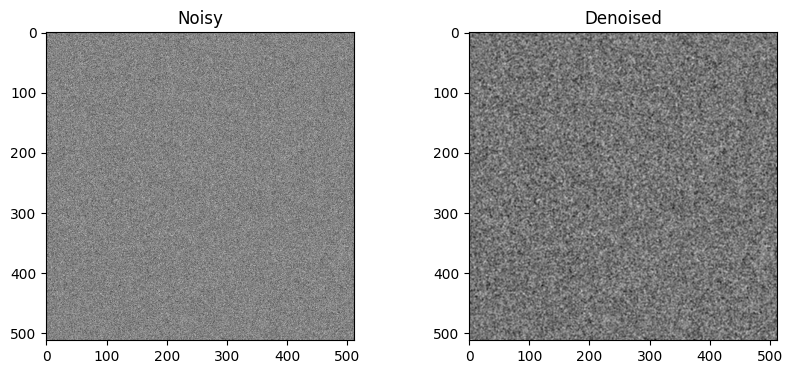

In [13]:
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised = mean_filter(noisy)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()


## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

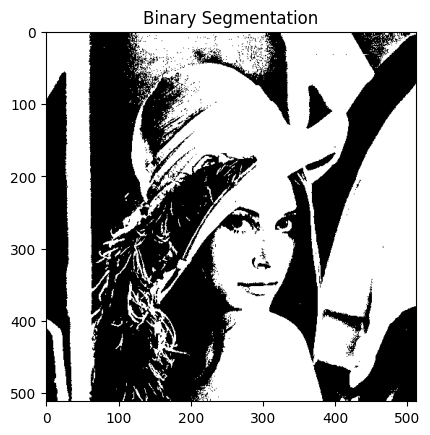

In [14]:
threshold = gray.mean()
binary = gray > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
No, this segmentation is not very reliable because using one threshold does not work well when the image has noise or different lighting levels.
# 2. What information is lost when converting to binary?
When converting to binary, the gray-level information is lost, so details like texture and shading are removed and only black and white remain.

#**9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

### 1. Image Acquisition
A synthetic grayscale image was created using NumPy.
Two different objects were added: a square and a triangle.
Each object has a different intensity value to represent distinct regions
in the image.

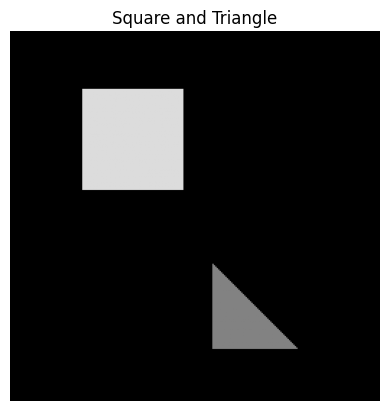

In [15]:
# Create empty image
image = np.zeros((256, 256))

# Object 1: Square
image[40:110, 50:120] = 220

# Object 2: Triangle
for i in range(60):
    image[160 + i, 140:140 + i] = 130

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Square and Triangle")
plt.axis('off')
plt.show()

### 2. Image Degradation (Noise)
Gaussian noise was added to the image to simulate noise that may occur
during image acquisition or transmission.


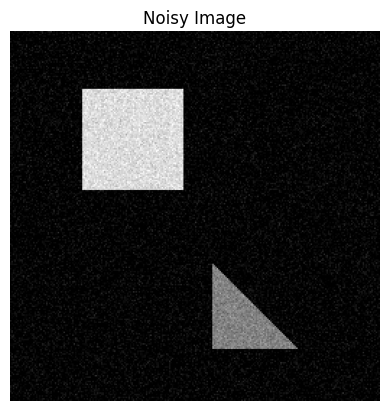

In [16]:
noise = np.random.normal(0, 15, image.shape)
noisy = image + noise

plt.imshow(noisy, cmap='gray', vmin=0, vmax=255)
plt.title("Noisy Image")
plt.axis('off')
plt.show()

### 3. Image Enhancement
Contrast stretching was applied to improve the visual appearance of the image.
This is a low-level process where the input and output are both images.

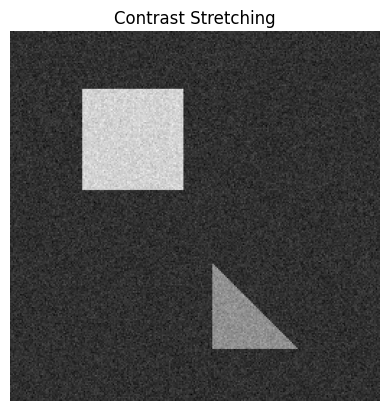

In [17]:
min_val = noisy.min()
max_val = noisy.max()

enhanced = (noisy - min_val) / (max_val - min_val) * 255

plt.imshow(enhanced, cmap='gray', vmin=0, vmax=255)
plt.title("Contrast Stretching")
plt.axis('off')
plt.show()

### 4. Image Restoration
A mean filter was used to reduce the noise added previously.
This step attempts to recover the image from degradation.


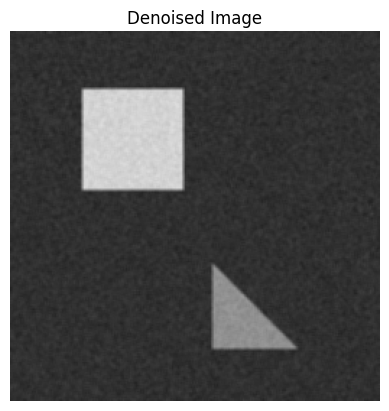

In [18]:
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised = mean_filter(enhanced)

plt.imshow(denoised, cmap='gray', vmin=0, vmax=255)
plt.title("Denoised Image")
plt.axis('off')
plt.show()

### 5 .Segmentation
Binary thresholding was applied to separate objects from the background.
This is considered a mid-level processing stage in the image processing pipeline.


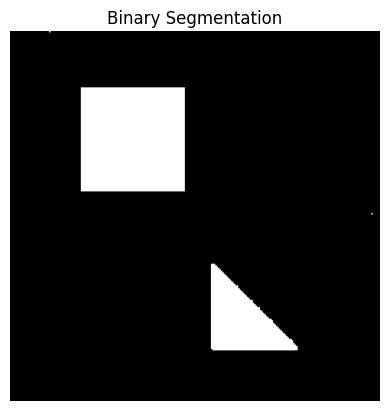

In [19]:
threshold = denoised.mean()
binary = denoised > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.axis('off')
plt.show()

##10. Reflection questions


##1. Where does image processing end and image analysis begin in your mini project?

Image processing ends after the segmentation step, and In this mini-project there is no image analysis, but image analysis will begin once we identify the objects present in the image.


##2. Which steps correspond to low level processing only?

The low level processing steps are image acquisition, adding noise, image enhancement, and denoising.

##3. Why is digitisation always an approximation of realit?

because real scenes are continuous, but digital images are represented using pixels and limited intensity values.